In [13]:
import pandas as pd

energy_mitigations_on = pd.read_table("stock/final_form/energy_raw.txt", delimiter=":", header=0)
energy_mitigations_off = pd.read_table("new_meltdown/final_form/energy_raw.txt", delimiter=":", header=0)
energy_mitigations_on.head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead.
  after removing the cwd from sys.path.


,apache,cachebench_memcpy,cachebench_memset,cachebench_mixed,cachebench_read,cachebench_write,create_files,create_processes,create_threads,launch_programs,...,sqlite,stress_ng_cpu,stress_ng_fork,stress_ng_matrix,stress_ng_msg,stress_ng_sem,stress_ng_sock,stress_ng_switch,stress_ng_vecmath,Unnamed: 51
0,2800.4,2534.2,2299.0,2408.9,2222.3,2337.3,199.7,264.6,246.6,365.0,...,15564.0,2398.3,2179.2,2613.9,2498.9,2170.7,2725.5,2758.7,2417.0,NaN
1,2848.4,2537.7,2301.7,2407.5,2224.1,2341.5,212.3,299.3,200.3,380.7,...,15795.8,2436.5,2599.5,2510.5,2460.7,1134.2,2804.9,2706.7,2441.2,NaN
2,2810.9,2525.8,2362.3,2454.1,2277.0,2303.0,172.1,268.0,243.1,366.8,...,16165.3,2434.1,2466.7,2676.1,2585.4,2196.4,2743.2,2764.6,2356.8,NaN
3,2907.9,2574.7,2323.3,1138.5,2145.9,2272.3,181.9,198.4,197.9,292.5,...,24943.3,2450.2,2512.8,2605.1,2552.5,2234.5,2804.5,2611.7,2360.9,NaN
4,2818.3,1245.8,2320.4,2422.0,2242.6,2299.3,180.2,257.3,192.0,249.6,...,15980.9,2437.7,2563.6,2588.1,2517.0,2295.2,2751.0,2782.3,2460.2,NaN


In [14]:
#energy_consumption.drop(energy_consumption.index[len(energy_consumption)-1])
energy_mitigations_on.describe()
energy_mitigations_off.describe()
energy_mitigations_off.mean()
#energy_consumption.median()

apache                   2668.035
cachebench_memcpy        2380.720
cachebench_memset        2276.785
cachebench_mixed         2365.130
cachebench_read          2236.925
cachebench_write         2289.760
create_files              194.240
create_processes          266.965
create_threads            225.695
launch_programs           341.240
mcperf_add                677.205
mcperf_append             635.365
mcperf_delete             424.170
mcperf_get                405.115
mcperf_prepend            629.230
mcperf_replace            623.425
mcperf_set                654.585
mem_alloc                 167.440
netperf_tcp_maerts       3497.845
netperf_tcp_rr           3314.800
netperf_tcp_sendfile     3526.425
netperf_tcp_stream       3453.070
netperf_udp_rr           3523.705
netperf_udp_stream       3511.870
nginx                    1809.905
openssl_aes              2382.995
openssl_blowfish          724.155
openssl_camellia         2291.340
openssl_cast              697.265
openssl_dsa   

In [53]:
energy_mitigations_on.mean()

apache                   2879.730
cachebench_memcpy        2470.385
cachebench_memset        2327.400
cachebench_mixed         2335.665
cachebench_read          2182.975
cachebench_write         2309.585
create_files              188.245
create_processes          275.330
create_threads            211.320
launch_programs           322.920
mcperf_add                682.755
mcperf_append             661.340
mcperf_delete             466.460
mcperf_get                464.350
mcperf_prepend            640.725
mcperf_replace            644.835
mcperf_set                684.005
mem_alloc                 192.920
netperf_tcp_maerts       3290.570
netperf_tcp_rr           3476.590
netperf_tcp_sendfile     3515.900
netperf_tcp_stream       3420.280
netperf_udp_rr           3505.420
netperf_udp_stream       3477.705
nginx                    1988.240
openssl_aes              2397.490
openssl_blowfish          728.490
openssl_camellia         2181.765
openssl_cast              721.995
openssl_dsa   

In [21]:
import numpy as np
import scipy as sp
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, h, m-h, m+h

In [22]:
energy_mitigations_on.apply(lambda x: mean_confidence_interval(x.dropna()), axis=0)

/usr/local/lib64/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib64/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib64/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib64/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib64/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


apache               (2626.95, 117.6231146538545, 2509.326885346145...
cachebench_memcpy    (2512.525, 19.848979899778236, 2492.6760201002...
cachebench_memset    (2265.98, 92.2809029976609, 2173.699097002339,...
cachebench_mixed     (2362.3800000000006, 75.737881170936, 2286.642...
cachebench_read      (2235.5150000000003, 18.46295541373663, 2217.0...
cachebench_write     (2299.705, 14.786382295447858, 2284.9186177045...
create_files         (203.94, 9.45079804793465, 194.48920195206534,...
create_processes     (265.15500000000003, 17.670428363505586, 247.4...
create_threads       (201.29500000000002, 23.076617329982543, 178.2...
launch_programs      (340.375, 25.343855757313186, 315.031144242686...
mcperf_add           (687.255, 9.008075697235256, 678.2469243027647...
mcperf_append        (607.3, 41.31100027006574, 565.9889997299342, ...
mcperf_delete        (399.505, 17.583168940855703, 381.921831059144...
mcperf_get           (403.66499999999996, 11.117529288835927, 392.5...
mcperf

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
melted_df_mitigations_on = energy_mitigations_on.melt(value_name ='Energy consumption of Log base 10')
melted_df_mitigations_off = energy_mitigations_off.melt(value_name ='Energy consumption of Log base 10')
melted_df_mitigations_on.head()

,variable,Energy consumption of Log base 10
0,apache,2676.0
1,apache,2716.3
2,apache,2673.9
3,apache,2644.4
4,apache,2339.5


In [25]:
melted_df_mitigations_on.rename({0: 'variable'}, axis='columns', inplace=True)
melted_df_mitigations_off.rename({0: 'variable'}, axis='columns', inplace=True)
melted_df_mitigations_on.head()

,variable,Energy consumption of Log base 10
0,apache,2676.0
1,apache,2716.3
2,apache,2673.9
3,apache,2644.4
4,apache,2339.5


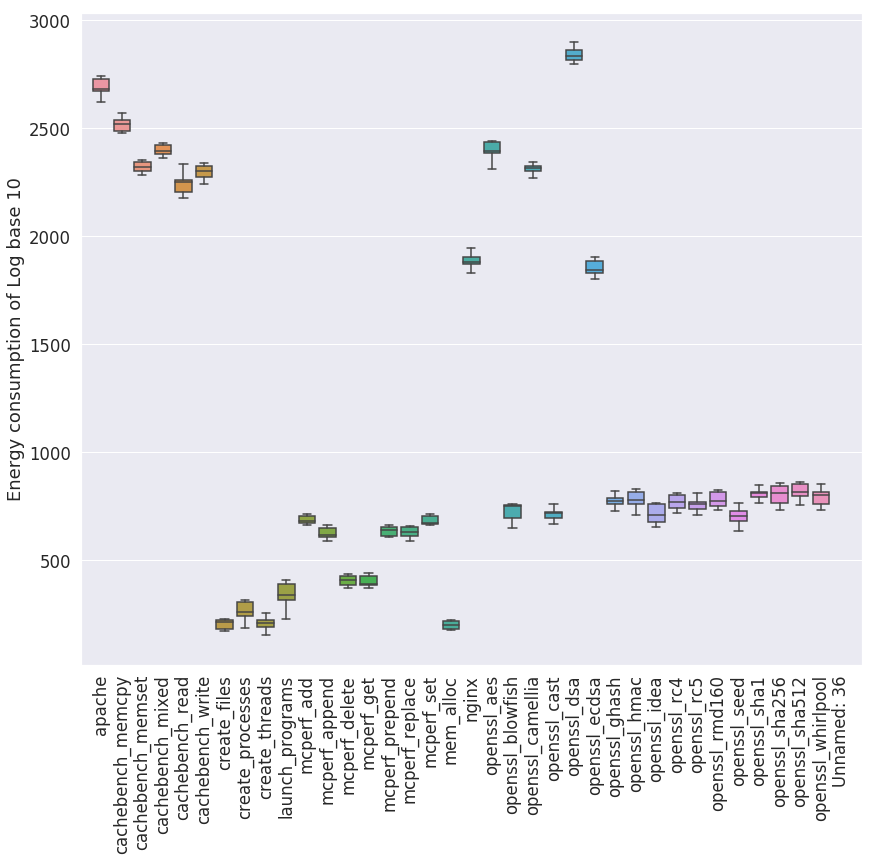

In [26]:
fig, ax = plt.subplots()

sns.set(font_scale=1.5)
fig.set_size_inches(14, 12)
g = sns.boxplot(x="variable", y="Energy consumption of Log base 10", data=melted_df_mitigations_on, showfliers=False)
ticklabels = g.get_xticklabels()
x_lim = g.get_xlim()
g.set_xlim(x_lim[0] - 0.5, x_lim[1] + 0.5)
_ = g.set_xticklabels(ticklabels, rotation=90)
ax.set_xlabel('')
fig.savefig('boxplots_mitigations_on.pdf', bbox_inches='tight')

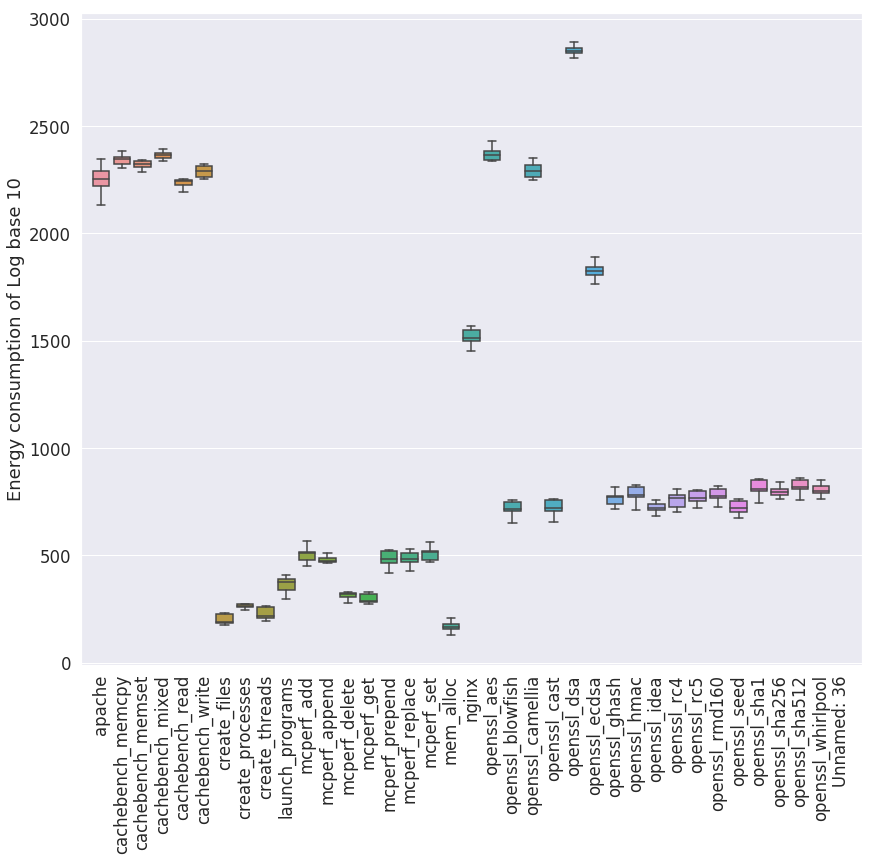

In [27]:
fig, ax = plt.subplots()

sns.set(font_scale=1.5)
fig.set_size_inches(14, 12)
g = sns.boxplot(x="variable", y="Energy consumption of Log base 10", data=melted_df_mitigations_off, showfliers=False)
ticklabels = g.get_xticklabels()
x_lim = g.get_xlim()
g.set_xlim(x_lim[0] - 0.5, x_lim[1] + 0.5)
_ = g.set_xticklabels(ticklabels, rotation=90)
ax.set_xlabel('')
fig.savefig('boxplots_mitigations_off.pdf', bbox_inches='tight')